# Исследование объявлений о продаже квартир

<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Дополнительные-расчеты" data-toc-modified-id="Дополнительные-расчеты-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Дополнительные расчеты</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></div>

## Введение

Мы имеем данные о продаже квартир с 2014 по 2019 год в Санкт_петербурге и Ленинградской области. У нас имеются данные по общей площади, удаленности от центра, количеству комнат, последней цене.

Необходимо проверить гипотезы о том, что на цену квартиры влияет площадь, этаж, удаленность от центра, высота потолков, количество комнат. 

На основании этих данных нам предстои выявить факторы, которые связаны со стоимостью квартир. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns;

In [2]:
try: 
    estate_data = pd.read_csv(r'C:\#####', sep='\t')
except: 
    estate_data = pd.read_csv('#####', sep='\t')

In [3]:
estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
estate_data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
estate_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [6]:
estate_data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3656,6,3940000.0,31.81,2019-01-25T00:00:00,1,2.70,22.0,NaN,17,NaN,...,9.27,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21501,10,5250000.0,29.60,2018-07-12T00:00:00,1,3.00,5.0,16.4,5,NaN,...,6.20,1.0,Санкт-Петербург,22481.0,2733.0,2.0,332.0,3.0,50.0,55.0
20423,5,2850000.0,54.00,2017-12-13T00:00:00,2,2.50,9.0,31.0,8,NaN,...,8.50,2.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
23114,6,7300000.0,102.00,2017-11-16T00:00:00,3,NaN,13.0,55.0,3,NaN,...,16.00,5.0,Кронштадт,65254.0,46979.0,1.0,266.0,1.0,1110.0,199.0
16055,6,4600000.0,63.00,2017-05-03T00:00:00,2,NaN,21.0,NaN,2,False,...,19.00,2.0,Санкт-Петербург,35394.0,11243.0,0.0,NaN,0.0,NaN,265.0
3194,3,2700000.0,51.00,2018-02-24T00:00:00,3,2.70,5.0,35.0,1,False,...,6.00,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,350.0
20970,12,3310000.0,56.00,2017-06-02T00:00:00,2,NaN,5.0,31.0,5,NaN,...,NaN,1.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,318.0
7608,11,6700000.0,75.20,2017-04-29T00:00:00,3,2.63,14.0,47.5,7,NaN,...,10.60,NaN,Санкт-Петербург,35535.0,15837.0,0.0,NaN,3.0,383.0,689.0
10506,0,12000000.0,96.00,2018-02-01T00:00:00,4,3.10,5.0,68.0,1,NaN,...,12.00,NaN,Санкт-Петербург,22885.0,1782.0,2.0,485.0,2.0,639.0,126.0


In [7]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Распаковка

Мы распаковали датафрейм и получили описание каждого столбца. 

На первом этапе мы видим, что в выгрузке присутсвуют столбцы с пропущенными значениями: ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 

Часть пропусков можно объяснить тем, что создатель объявления просто не внес эти данные: ceiling_height, floors_total, living_area, kitchen_area, balcony. Видимо, это не обязательные поля при создании объявления. 

В столбцах is_apartment и balcony пустые значение могут означать, что балконов в квартире нет и они не являются апартаментами. Заполним пропуски нулями. 

Странными выглядят пропуски в столбике locality_name. Объявление без города быть не может. Нужно будет проверить эти строки.

Пустые значения в days_expositions можно объяснить тем, что эти объявления ещё открыты и не нашли своих жильцов, либо это ошибка в работе программы. 

Другие данные скорее всего заполняются автоматически приложением. Есть гипотеза, что автоматически заполняемые данные отсутствуют только в маленьких городах, т.к. в них нет аэропортов, большого количества парков и водоемов (либо расстояние до них не имеет значения). Проверим, сколько пропущенны данных по Санкт-Петербургу.

#### Создадим функцию, которая принимает список городов и ищет среди них СПб. 

In [8]:
def search_spb(town_list):
    count_of_spb = 0
    for town in town_list:
        if town=='Санкт-Петербург':
            count_of_spb += 1  
    return count_of_spb

Далее создадим цикл, который перебирает столбики с пропущенными значениями, отбирает по ним пропущенные значения и считает, сколько из них из Санкт-Петербурга. 

In [9]:
nan_list = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

print('Количество пропущенных значений по городу Санкт-Петербург')
print('Автоматически рассчитываемые значения')
print()

number_spb = (len(estate_data[estate_data['locality_name']=='Санкт-Петербург']))
print(number_spb, 'строк с с объявлениями из СПб')
print()
for name in nan_list:
    print('В столбце {}'.format(name))
    count = search_spb(estate_data[estate_data[name].isna()].locality_name)
    print('Пропущенных значений {}. Это {:.1%}'.format(count,count/number_spb))
    print()

Количество пропущенных значений по городу Санкт-Петербург
Автоматически рассчитываемые значения

15721 строк с с объявлениями из СПб

В столбце airports_nearest
Пропущенных значений 85. Это 0.5%

В столбце cityCenters_nearest
Пропущенных значений 61. Это 0.4%

В столбце parks_around3000
Пропущенных значений 61. Это 0.4%

В столбце parks_nearest
Пропущенных значений 8437. Это 53.7%

В столбце ponds_around3000
Пропущенных значений 61. Это 0.4%

В столбце ponds_nearest
Пропущенных значений 7738. Это 49.2%

В столбце days_exposition
Пропущенных значений 2083. Это 13.2%



Видим, что в большинстве столбиков процент пропущенных значений дествительно незначительный. Но есть 3 столбика, где пропуски ощутимые - ponds_nearest, parks_nearest, days_exposition. Посмотрим, сколько пропущенных значений по всему датафрейму.

In [10]:
print ('{:.2%} данных по ближайшим паркам'.format(8079/23699))
print ('{:.2%} данных по ближайшим водоемам'.format(9110/23699))

34.09% данных по ближайшим паркам
38.44% данных по ближайшим водоемам


Процент заполненных данных ещё ниже. В СПб ещё не всё так плохо. Пропуски можно объяснить тем, что в Санкт-Петербурге очень плохо обстоят дела с парками. По некоторым [рейтингам](https://federalcity.ru/index.php?newsid=8295), Санкт_Петербург находится на последних местах по озеленению города, водоемы же обычно идут вместе с парками. Возможно, автоматическая программа ищет парки и водоемы в определенном радиусе и, если не находит их, то ставит пустые значения.

#### Проверим пустые значения в других населенных пунктах

In [11]:
data_towns = estate_data[estate_data['locality_name']!='Санкт-Петербург']
df_towns = data_towns.pivot_table(index='locality_name', values=['ponds_around3000','first_day_exposition'], aggfunc='count')
#df_towns.columns = ['full_data', 'count_ad']
df_towns['percent']=1-(df_towns['ponds_around3000']/df_towns['first_day_exposition'])
df_towns.sort_values('percent').head()
#Проверял значения на 50 строках по каждому столбцу

,first_day_exposition,ponds_around3000,percent
locality_name,,,
посёлок Сапёрный,6,6,0.0
посёлок Песочный,4,4,0.0
Пушкин,369,369,0.0
посёлок Петро-Славянка,1,1,0.0
посёлок Молодёжное,5,5,0.0


Мы видим, что данные по доступности центра, аэропорта, парков и водоемов присутствуют только в населенных пунктах, которые являются районами Санкт-Петербурга как субъекта федерации либо его пригородами (Мурино, Кудрово). 

Следовательно, мы можем подтвержить гипотезу, что отсутствующие значения в датафрейме в основном касаются малых населенных пунктов, которые не являются частью Санкт-Петербурга.

#### Проверим пустые значения в столбике с названием населенных пунктов

In [12]:
estate_data[estate_data['locality_name'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,49.0,8.000000e+00,5.552777e+00,0.0,3.00,7.000,10.00,20.0
last_price,49.0,6.745167e+06,4.496722e+06,1750000.0,3950000.00,5130593.000,8000000.00,24000000.0
total_area,49.0,6.979980e+01,3.057596e+01,29.4,46.50,63.000,83.00,178.3
rooms,49.0,2.326531e+00,9.440108e-01,1.0,2.00,2.000,3.00,4.0
ceiling_height,14.0,2.990714e+00,3.868704e-01,2.6,2.75,2.875,3.09,4.0
floors_total,48.0,9.666667e+00,7.677913e+00,2.0,5.00,6.000,11.25,24.0
living_area,44.0,3.915273e+01,1.769466e+01,13.0,27.55,35.900,51.10,94.0
floor,49.0,5.448980e+00,5.784538e+00,1.0,2.00,3.000,6.00,23.0
kitchen_area,40.0,1.238950e+01,7.497993e+00,5.0,8.20,10.200,12.25,41.6
balcony,43.0,3.255814e-01,7.470874e-01,0.0,0.00,0.000,0.00,4.0


Судя по наличию данных по доступности аэропорта, парков и водоемов, а также по средней стоимости недвижимости, эти строки скорее всего относятся к Санкт-Петербургу. Заполним их на следующем этапе. 

#### Проверим пустые значения в столбике days_exposition

In [13]:
estate_data[estate_data['days_exposition'].isna()].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18699,8,3550000.0,44.2,2018-09-05T00:00:00,2,2.50,4.0,28.4,1,NaN,...,5.3,NaN,Санкт-Петербург,18378.0,17380.0,1.0,662.0,0.0,NaN,NaN
7951,20,3500000.0,39.4,2019-01-06T00:00:00,1,2.78,6.0,18.0,4,NaN,...,9.0,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21197,9,2000000.0,35.6,2018-10-25T00:00:00,1,2.50,5.0,17.1,3,NaN,...,8.3,NaN,посёлок Войскорово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,19,4999000.0,52.0,2019-04-23T00:00:00,2,2.61,9.0,30.0,6,NaN,...,9.0,2.0,Санкт-Петербург,12444.0,15035.0,0.0,NaN,1.0,881.0,NaN
3608,15,1200000.0,33.0,2019-01-05T00:00:00,1,NaN,2.0,16.5,2,NaN,...,7.0,NaN,посёлок Усть-Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19431,19,5400000.0,54.7,2018-10-31T00:00:00,3,2.55,5.0,37.4,2,False,...,6.3,NaN,Санкт-Петербург,26798.0,13502.0,0.0,NaN,0.0,NaN,NaN
2824,15,10900000.0,77.0,2018-08-16T00:00:00,3,2.60,17.0,51.8,13,NaN,...,9.6,NaN,Санкт-Петербург,35513.0,15519.0,0.0,NaN,1.0,992.0,NaN
14895,3,4300000.0,31.0,2019-03-06T00:00:00,1,2.70,16.0,18.0,12,NaN,...,NaN,NaN,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,NaN
11089,20,9800000.0,105.3,2018-04-11T00:00:00,4,3.00,4.0,69.0,1,NaN,...,8.0,NaN,Санкт-Петербург,38711.0,7971.0,2.0,619.0,3.0,180.0,NaN
12811,9,20000000.0,128.0,2019-04-04T00:00:00,6,3.56,5.0,85.3,3,NaN,...,15.2,NaN,Санкт-Петербург,23974.0,4542.0,1.0,526.0,1.0,935.0,NaN


Видим разные года размещения. Гипотеза, что это недавние объявления, не подтвердилась. Однако это не опровергает предположения, что по этим объявлениям не нашелся покупатель. Может они так и висят в выдаче на дне поиска, не находя своего покупателя, забытые самими продавцами.

### Вывод 
У нас имеется большое количество колонок с пропущенными значениями. В колонке balcony мы зааменим пропуски на 0, в колонке is_apartment на логическое False. В остальных колонках мы возьмем средние значения по городам и заменим пропуски. 





## Предобработка данных

#### Заменим пропуски в столбиках is_apartment и balcony. 

In [14]:
estate_data.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [15]:
estate_data.balcony.value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

В первом случае мы имеем дело с булевыми значениями, хотя данные хранятся как строки. Поменяем формат данных.

Во втором случае заполним пропуски нулями.

In [16]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(value=False).astype('bool')

In [17]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(value=False).astype('bool')

Заполнили пропуски в параметре "апартаменты" на False. Изменили тип данных на boolean. 

In [18]:
#estate_data['balcony'] = estate_data['balcony'].fillna(value=0)

Заполнили пропуски параметра "балкон" нулями. Осталось поменять тип данных в столбике first_day_exposition. 

In [19]:
estate_data['first_day_exposition'] =pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M')

#### Заменим пропуски в locality_name на Санкт-Петербург.

In [20]:
#estate_data['locality_name'] = estate_data['locality_name'].fillna(value='Санкт-Петербург')

In [21]:
estate_data = estate_data.fillna({'locality_name':'Санкт-Петербург','balcony':0})

#### Заменим пропуски в floors_total на медианные значения

Для начала напишем функцию, которая меняет пустые ячейки на медианное значение по городу по нужной колонке. Если по городу значений нет, то ставим -777.

In [22]:
def fill_median(data, column, groper):
    median_data = data.pivot_table(index=groper, values=column, aggfunc='median').round()
    variable = 'median_{}'.format(column)
    median_data.columns = [variable]
    data = data.merge(median_data, how='left', on=groper)
    data[variable] = data[variable].fillna(-777)
    data[column] = data[column].where(data[column].notna(),data[variable])
    return data

Заменим пропуски для floors_total. 

In [23]:
estate_data = fill_median(estate_data, 'floors_total', 'locality_name')

#### Заменим пропуски в ceiling_height на медианные значения

In [24]:
estate_data_vrong1 = fill_median(estate_data, 'ceiling_height','locality_name')
# Медиана приводит к появлению сильного выброса. 
#Заполним пропуски -777
estate_data['ceiling_height']=estate_data['ceiling_height'].fillna(-777)

####  Можно проработать проблему с пропусками данных жилой площади и площади кухни. 

In [25]:
print('Пропусков жилой площади', len(estate_data[estate_data['living_area'].isna()]))
print('Пропусков  площади кухни', len(estate_data[estate_data['kitchen_area'].isna()]))

Пропусков жилой площади 1903
Пропусков  площади кухни 2278


In [26]:
estate_data.query('open_plan == True')[['living_area','kitchen_area']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 349 to 23592
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   living_area   62 non-null     float64
 1   kitchen_area  0 non-null      float64
dtypes: float64(2)
memory usage: 1.6 KB


67 квартир с открытой планировкой, площадь кухни нигде не указана. Только в 5 не указана жилая.  

In [27]:
estate_data.query('is_apartment == True')[['living_area','kitchen_area']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 543 to 23236
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   living_area   42 non-null     float64
 1   kitchen_area  35 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


50 апартаментов, в 15 не указана площадь кухни, в 8 жилая площадь.

In [28]:
estate_data.query('studio == True')[['living_area','kitchen_area']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 144 to 23637
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   living_area   139 non-null    float64
 1   kitchen_area  0 non-null      float64
dtypes: float64(2)
memory usage: 3.5 KB


149 студий, нигде не указана площадь кухни. В 10 не указана жилай площадь. 

Удалось выяснить, что площадь кухни не указывают в квартирах-студиях и в квартирах с открытой планировкой. Однако пропущенных значений гораздо больше, чем этих квартир вместе взятых. 

#### Замена в living_area

Можно рассчитать медианное значение жилой площади в зависимости от числа комнат в квартире.

In [29]:
estate_data = fill_median(estate_data,'living_area','rooms')

#### Замена в kitchen_area

Аналогичным образом посчитаем среднюю площадь кухни и заменим пропуки. 

In [30]:
estate_data = fill_median(estate_data,'kitchen_area','rooms')

#### Заполним пропуски в оставшихся столбиках

In [31]:
estate_data_vrong = fill_median(estate_data, 'days_exposition','locality_name')
# Поменяли медиану на маркер, т.к. приводит к выбросам. 

Т.к. слишком много пропущенных значений в следующих колонках, заполнение их медианой может привести к выбросам. Заменим пропуски -777. 

In [32]:
columns = (['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 
            'parks_around3000', 'ponds_around3000', 'ponds_nearest', 'days_exposition'])

for name in columns: 
    estate_data[name] = estate_data[name].fillna(-777)

#### Вывод
В ходе предобработки данных мы заполнили пропуски в столбцах balcony, is_apartment, locality_name. Поменяли тип данных в столбцах is_apartment и first_day_exposition. В остальных данных пропуски заменить не получилось. Выяснили, что в квартирах с открытой планировкой и в студиях никогда не указывают площадь кухни.  

## Дополнительные расчеты

#### Цена квадратного метра

In [33]:
estate_data['price_per_square']=estate_data['last_price']/estate_data['total_area']

Посчитали цену квадратного метра. 

#### День, месяц, год

In [34]:
estate_data['year']=estate_data['first_day_exposition'].dt.year

In [35]:
estate_data['month']=estate_data['first_day_exposition'].dt.month

In [36]:
estate_data['day']=estate_data['first_day_exposition'].dt.weekday 

Добавили день недели, месяц и год публикации объявления в отдельные столбики. 

#### Этажи

In [37]:
def floor_type (row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'other'

In [38]:
estate_data['floor_type']= estate_data.apply(floor_type, axis = 1)

Категоризировали этажи на "first", "last", "other". 

#### Соотношение площадей

In [39]:
estate_data['living_to_total']=estate_data['living_area']/estate_data['total_area']

In [40]:
estate_data['kitchen_to_total']=estate_data['kitchen_area']/estate_data['total_area']

Добавили дополнительные столбики с соотношением жилой площади и площади кухни к общей. 

#### Слишком дешевые квартиры

In [41]:
estate_data=estate_data.query('last_price>500000')

Исключили квартиры стоимостью ниже 500 000.

## Анализ данных

#### 1. Площадь, цена, число комнат, высота потолков

Изучим распределения площади, цены, числа комнат и высоты потолков. Используем для этого гистограммы. 

<AxesSubplot:title={'center':'Распределение площадей квартир'}, ylabel='Frequency'>

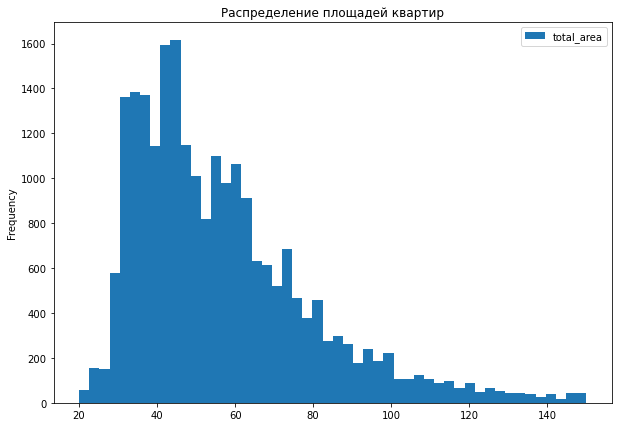

In [42]:
estate_data.plot(title='Распределение площадей квартир', kind='hist',y='total_area', range=(20,150), bins = 50, figsize=(10,7))

<AxesSubplot:title={'center':'Распределение цен'}, ylabel='Frequency'>

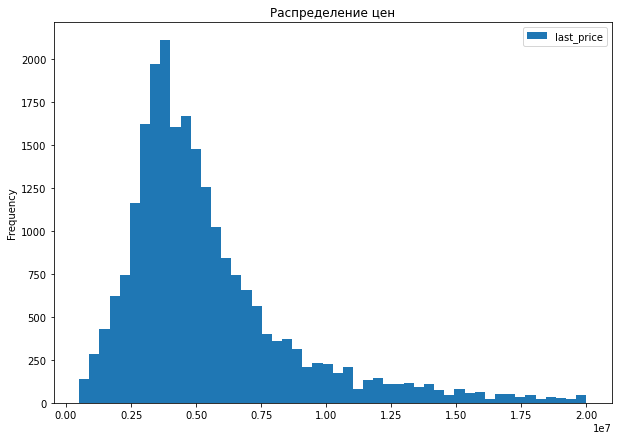

In [43]:
estate_data.plot(title='Распределение цен', kind='hist',y='last_price',range=(500000,20000000), bins = 50, figsize=(10,7))

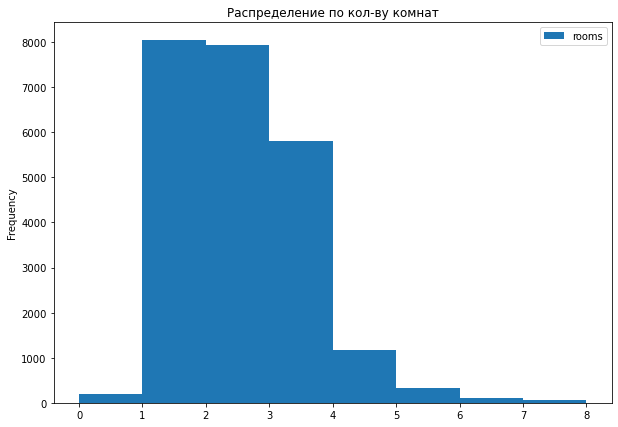

In [44]:
estate_data.plot(kind='hist',y='rooms',range=(0,8), bins = 8, figsize=(10,7))
plt.title('Распределение по кол-ву комнат')
plt.show()

<Figure size 720x504 with 0 Axes>

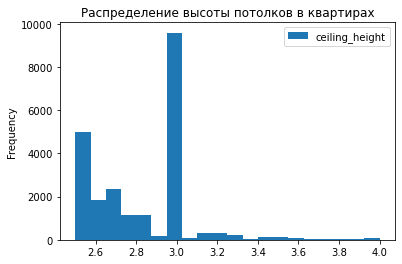

In [45]:
plt.figure(figsize=(10,7))
estate_data_vrong1.plot(kind='hist',y='ceiling_height',range=(2.5,4), bins = 20)
plt.title('Распределение высоты потолков в квартирах')
plt.show()

Подстановка медианного значения привела появлению сильного выброса. Вернемся, и заменим пропуски на маркер. 

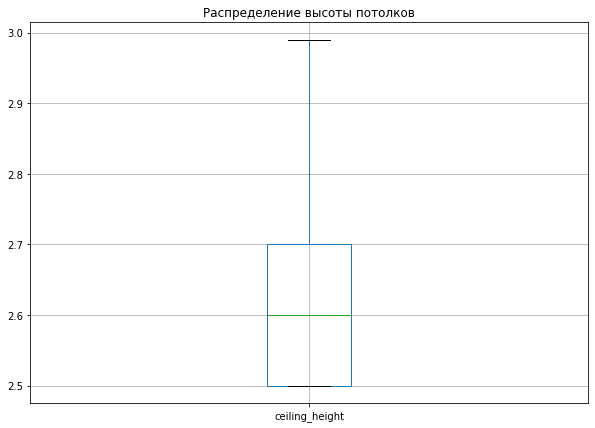

In [46]:
estate_data.query('3> ceiling_height>=2.5').boxplot('ceiling_height', figsize=(10,7))
plt.title('Распределение высоты потолков')
plt.show()

```python


residual = y-y_prime
q1 = residual.quantile(0.25)
q3 = residual.quantile(0.75)
iqr = q3-q1
lower_boundary = q1-1.5*iqr
upper_boundary = q3+1.5*iqr

```

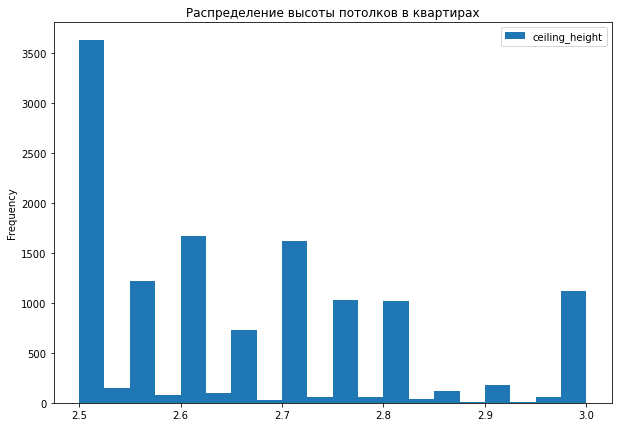

In [47]:
estate_data.plot(kind='hist',y='ceiling_height',range=(2.5,3), bins = 20,figsize=(10,7))
plt.title('Распределение высоты потолков в квартирах')
plt.show()

Так график выглядит значительно лучше.

#### Вывод по гистограммам
На первый взгляд может показаться, что на всех графиках мы видим хорошее Пуассоновское распределение. Однако здесь оно не применимо и нужно использовать нормальное распределение Гаусса, т.к. данные не характеризуют собой число событий за фиксированный промежуток времени, а передают информацию о некотром качестве объекта наблюдения.

И если мы смотрим на графики как на нормальное распределение, то явно можем увидеть отклонение распределения в сторону маленьких значений. Скорее всего это не связано с ошибкой в данных, а характеризует социально-экономическое состояние российского общества с преобладающим бедным слоем населения, покупающим малогабаритное жильё, маленьким средним классом и узкой прослойкой богатых людей.

#### Время продажи квартиры

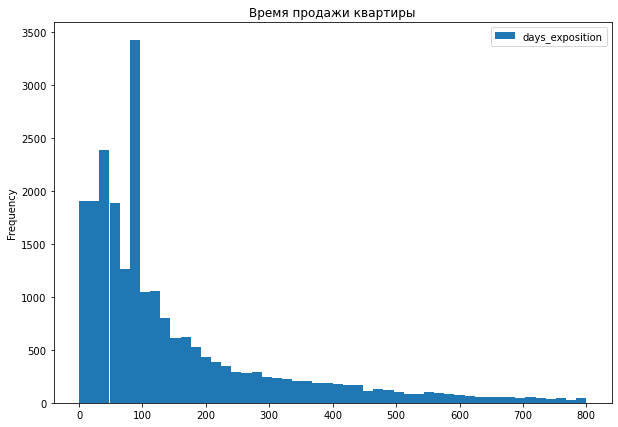

In [48]:
estate_data_vrong.plot(kind='hist',y='days_exposition', range =(0,800),bins = 50, figsize=(10,7))
plt.title('Время продажи квартиры')
plt.show()

На графике видим, что заполнение пропусков медианными значениями привело к появляению выброса. Видимо такие выбросы получаются, когда много пропущенных значений. Вернемся и заменим пропуски на -1. 

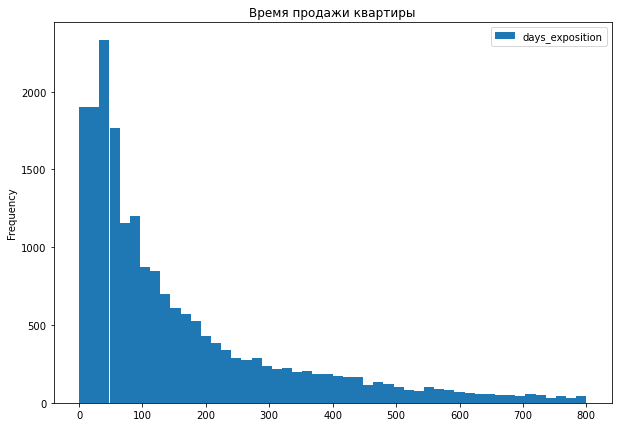

In [49]:
estate_data.plot(kind='hist',y='days_exposition', range =(0,800),bins = 50,figsize=(10,7))
plt.title('Время продажи квартиры')
plt.show()

In [50]:
estate_data.query('days_exposition>=0 and days_exposition<800').days_exposition.describe()

count    19908.000000
mean       155.837955
std        164.849865
min          1.000000
25%         44.000000
50%         91.000000
75%        212.000000
max        799.000000
Name: days_exposition, dtype: float64

Среднее значение значительно в два раза превышает медиану. Это связано со смещением распределения в левую сторону - квартиры очень быстро раскупают. Порог быстрых продаж можно установить в 45 дней, долгих в 212 дней.  

Заметны пики на 45 и 60 днях, при выборке от 0 до 100 дней. 

#### Корреляции

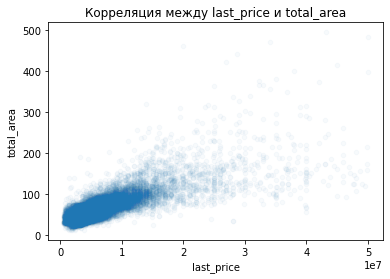

Коэффициент корреляции last_price с total_area : 0.65366620216965




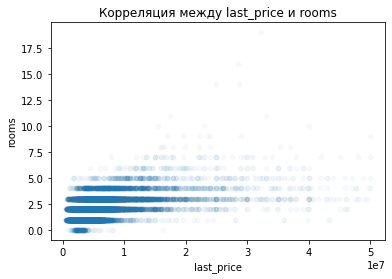

Коэффициент корреляции last_price с rooms : 0.3632015957879071




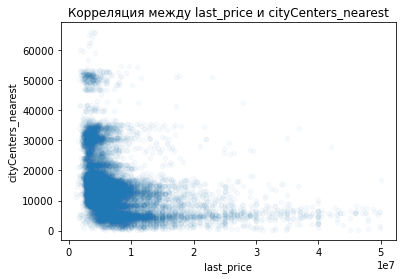

Коэффициент корреляции last_price с cityCenters_nearest : -0.04464551135208427




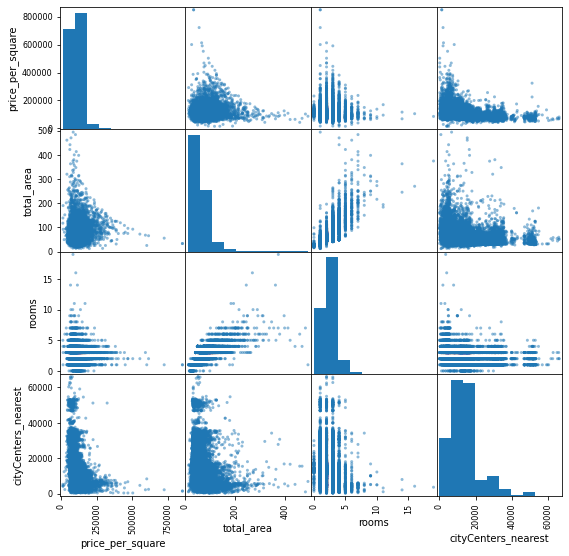

,price_per_square,total_area,rooms,cityCenters_nearest
price_per_square,1.000000,0.135418,-0.064176,-0.370605
total_area,0.135418,1.000000,0.781964,-0.222978
rooms,-0.064176,0.781964,1.000000,-0.172381
cityCenters_nearest,-0.370605,-0.222978,-0.172381,1.000000


In [51]:
correlation_list = ['total_area', 'rooms', 'cityCenters_nearest']
for i in correlation_list: 
    data = estate_data[estate_data[i]>=0].query('last_price<50000000')
    data.plot(x='last_price', y= i, kind='scatter', alpha=0.03)
    name='Корреляция между last_price и ' + i
    plt.title(name)
    plt.show()
    print('Коэффициент корреляции last_price с', i, ':', estate_data['last_price'].corr(estate_data[i]))
    print()
    print()
a=estate_data.query('last_price<50000000 and cityCenters_nearest>0')[['price_per_square','total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(a, figsize=(9, 9))
plt.show()
a.corr()

Видим чёткую линейную зависимость между ценой и площадью квартиры,коэффициент корреляции Пирсона положительный и больше 0,5. Можно сделать вывод, что площадь квартиры и цена связаны. Однако с увеличением стоимости квартиры эта связь становится слабее. 

Связи между ценой и количеством комнат нет. 

Связи между близостью к центру и ценой квартиры нет. 

Построили матрицу корреляции между этими же колонками и ценой за квадратный метр. Связи между данными нет. 

#### Зависимость от этажа, дня недели, месяца, года

In [52]:
#correlation_list = ['floor_type','year','month','day']

#for i in correlation_list: 
    #print('Данные по столбику last_price при группировке по ',i)
    #data = estate_data.query('last_price<50000000')
    #table = data.groupby(i).last_price.describe()
    #print(table)
    #print()
    #print()

In [53]:
estate_data.groupby('floor_type').last_price.describe()

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
first,2911.0,4.812516e+06,5.100320e+06,520000.0,2800000.0,3900000.0,5400000.0,135000000.0
last,3334.0,7.371362e+06,2.069703e+07,560000.0,3000000.0,4300000.0,6700000.0,763000000.0
other,17436.0,6.677841e+06,8.613073e+06,530000.0,3600000.0,4850000.0,7000000.0,330000000.0


Квартиры на первых и последних этажах стоят дешевле, при этом среди них двух на последнем оцениваются подешевле. 

*Цена и время размещения*

In [54]:
estate_data.groupby('year').last_price.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,137.0,1.208714e+07,1.251968e+07,1200000.0,4421650.0,7700000.0,14500000.0,79339000.0
2015,1191.0,8.572833e+06,1.330208e+07,650000.0,3750000.0,5350000.0,8270000.0,180000000.0
2016,2781.0,6.832467e+06,1.205042e+07,580000.0,3400000.0,4550000.0,6800000.0,401300000.0
2017,8188.0,6.587223e+06,1.341812e+07,520000.0,3350000.0,4500000.0,6700000.0,763000000.0
2018,8509.0,5.957416e+06,7.169367e+06,550000.0,3380000.0,4560000.0,6500000.0,330000000.0
2019,2875.0,6.791330e+06,9.304317e+06,530000.0,3700000.0,5050000.0,7200000.0,289238400.0


В 2014 году цена на недвижимость достигала своего пика, однако за этот год мы имеем меньше всего значений. С 2016 по 2018 цена оставалась стабильной. В 2019 снова выросла.

In [55]:
estate_data.groupby('month').last_price.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1499.0,6.672361e+06,9.338226e+06,585000.0,3400000.0,4600000.0,6850000.0,180000000.0
2,2635.0,6.479867e+06,1.035639e+07,530000.0,3390000.0,4650000.0,6750000.0,401300000.0
3,2586.0,6.361730e+06,9.579975e+06,550000.0,3400000.0,4650000.0,6600000.0,289238400.0
4,2377.0,6.742476e+06,1.254411e+07,550000.0,3500000.0,4800000.0,6860000.0,330000000.0
5,1273.0,6.605235e+06,1.002664e+07,600000.0,3450000.0,4530000.0,6800000.0,230000000.0
6,1759.0,6.313612e+06,8.082131e+06,560000.0,3300000.0,4400000.0,6525000.0,124480000.0
7,1691.0,6.663996e+06,9.097630e+06,600000.0,3475000.0,4650000.0,6910000.0,140000000.0
8,1742.0,6.356978e+06,7.934765e+06,550000.0,3400000.0,4580000.0,6700000.0,159984000.0
9,1981.0,6.825470e+06,1.845247e+07,520000.0,3470000.0,4700000.0,6990000.0,763000000.0


Серьезных различий в стоимости квартир по месяцам нет. 

In [56]:
estate_data.groupby('day').last_price.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
0,3608.0,6.518323e+06,9.635227e+06,600000.0,3450000.0,4650000.0,6700000.0,300000000.0
1,4179.0,6.399906e+06,8.604414e+06,550000.0,3450000.0,4750000.0,6800000.0,289238400.0
2,3972.0,6.631191e+06,1.178508e+07,530000.0,3429750.0,4700000.0,6900000.0,420000000.0
3,4291.0,6.714465e+06,8.471763e+06,550000.0,3450000.0,4650000.0,6990000.0,159984000.0
4,3999.0,6.373612e+06,8.537332e+06,520000.0,3442000.0,4590000.0,6700000.0,190870000.0
5,1936.0,6.976804e+06,2.164515e+07,550000.0,3372500.0,4555000.0,6600000.0,763000000.0
6,1696.0,6.256392e+06,7.898418e+06,600000.0,3400000.0,4550000.0,6500000.0,130000000.0


По дням различий тоже нет. 

#### Топ 10 городов

In [57]:
top_10 = estate_data.groupby('locality_name').first_day_exposition.count().sort_values(ascending=False).head(10)
city_list = top_10.index
sum_adv = top_10.sum()

In [58]:
df_top10 = estate_data.query('locality_name in @city_list')
data_top10 = estate_data.query('locality_name in @city_list').pivot_table(index = 'locality_name', values =['last_price','total_area'], aggfunc ='mean')
data_top10['price_square']=data_top10['last_price']/data_top10['total_area']
mean_price = data_top10.price_square.sum()/data_top10.price_square.count()
mean_price

83556.7467496779

In [59]:
data_top10.last_price.sum()/data_top10.total_area.sum()

84502.96444439827

In [60]:
df_top10.last_price.sum()/df_top10.total_area.sum()

118093.85210453026

In [61]:
data_top10.price_square.sort_values(ascending = False)

locality_name
Санкт-Петербург      124434.534221
Пушкин               105097.361245
деревня Кудрово       90916.895213
посёлок Парголово     87110.874551
посёлок Мурино        83203.314920
посёлок Шушары        76328.217594
Колпино               74467.617484
Гатчина               68475.381534
Всеволожск            67635.128626
Выборг                57898.142109
Name: price_square, dtype: float64

Самое дорогое жильё в Санкт-Петербурге, самое дешевое в Выборге. Можно проследить зависимость, чем ближе насленные пункты к Санкт-Петербургу, тем дороже в нём стоимость квадратного метра. 

#### Центр Санкт-Петербурга

In [62]:
warnings.simplefilter('ignore')

In [63]:
SaintP= estate_data.query('cityCenters_nearest>=0 and locality_name == "Санкт-Петербург"')
SaintP['center_distance']=(SaintP['cityCenters_nearest']/1000).round()

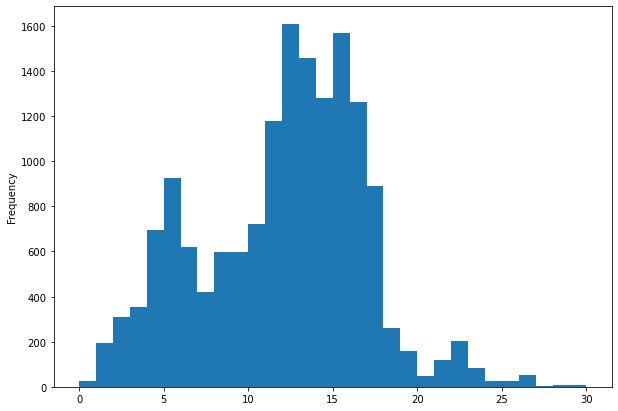

In [64]:
SaintP['center_distance'].plot(kind='hist', bins=30, range = (0,30), figsize=(10,7))
plt.show()

<AxesSubplot:xlabel='center_distance'>

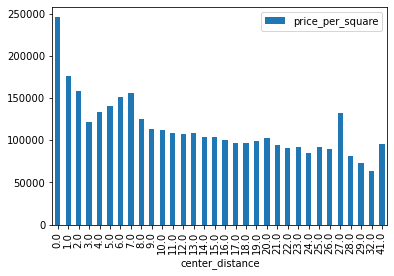

In [65]:
SaintP.pivot_table(index='center_distance', values='price_per_square', aggfunc='mean').plot(kind='bar')

<AxesSubplot:xlabel='center_distance'>

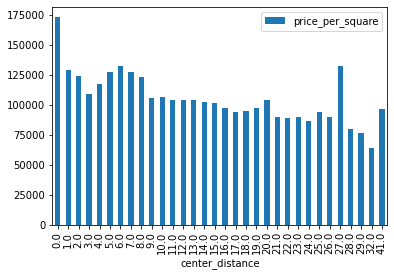

In [66]:
SaintP.pivot_table(index='center_distance', values='price_per_square', aggfunc='median').plot(kind='bar')

<AxesSubplot:xlabel='center_distance', ylabel='last_price'>

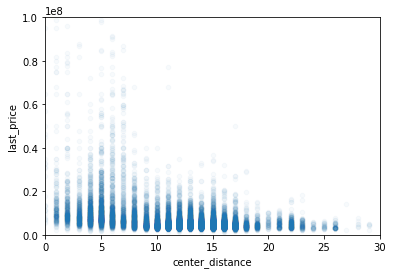

In [67]:
SaintP.plot(y='last_price', x='center_distance', kind='scatter', alpha=0.03, xlim=(0,30), ylim=(0,100000000))

In [68]:
SaintP['last_price'].corr(SaintP['center_distance'])

-0.2586177761851798

При сравнении средних значений мы видим, что есть определенная динамика к уменьшению стоимости квадратного метра при отдалении от центра. Однако диаграмма рассеивания коэффициент корреляции связи не показывают. Это означает, что в большинстве квартир в центре города цена квадратного метра такая же, как и в других районах, однако в центре больше дорогих квартир, которые влияют на средние значения. 

Н графиках можно заметить резкий переход на 8 км. Можно выделить эту область как центр города. 

In [69]:
peter_centre = SaintP.query('0 <=center_distance <= 8')
peter_centre_split = peter_centre[['total_area','last_price','rooms','ceiling_height']].query('10>=ceiling_height >=0').query('last_price<50000000')

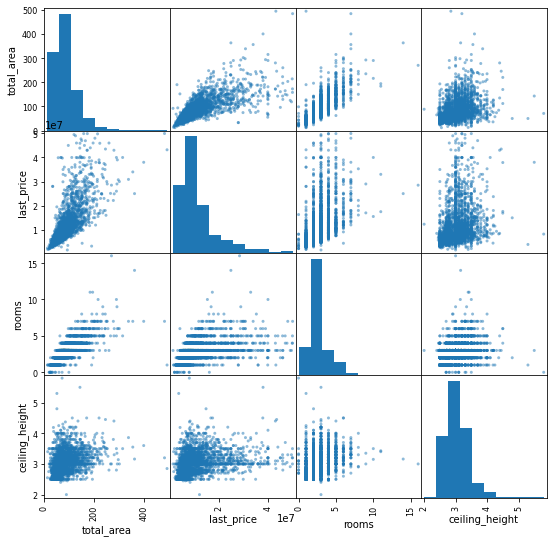

In [70]:
pd.plotting.scatter_matrix(peter_centre_split, figsize=(9, 9))
plt.show()

In [71]:
peter_centre_split.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.735415,0.779088,0.330313
last_price,0.735415,1.000000,0.454695,0.261196
rooms,0.779088,0.454695,1.000000,0.277166
ceiling_height,0.330313,0.261196,0.277166,1.000000


In [72]:
estate_data.query('10>=ceiling_height >=2 and locality_name=="Санкт-Петербург"')[['total_area','last_price','rooms','ceiling_height']].query('last_price<50000000').corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.804781,0.786415,0.457434
last_price,0.804781,1.000000,0.537612,0.477336
rooms,0.786415,0.537612,1.000000,0.292611
ceiling_height,0.457434,0.477336,0.292611,1.000000


In [73]:
(
estate_data.loc
    [(estate_data['ceiling_height']<=10)
     &(estate_data['ceiling_height']>=2)
     &(estate_data['locality_name']=="Санкт-Петербург")
     &(estate_data['last_price']<50000000),
     ['total_area','last_price','rooms','ceiling_height']]
    .corr()
)

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.804781,0.786415,0.457434
last_price,0.804781,1.000000,0.537612,0.477336
rooms,0.786415,0.537612,1.000000,0.292611
ceiling_height,0.457434,0.477336,0.292611,1.000000


Мы видим зависимость между ценой и площадью, ценой и количеством комнат по всему городу. Однако в центре нет связи между ценой и количеством комнат. 

In [74]:
estate_data.query('10>=ceiling_height >=2 and locality_name=="Санкт-Петербург"')[['total_area','last_price','rooms','ceiling_height']].query('last_price<50000000').describe()

,total_area,last_price,rooms,ceiling_height
count,10010.000000,1.001000e+04,10010.000000,10010.000000
mean,64.175986,7.424843e+06,2.205894,2.759089
std,34.890106,5.546054e+06,1.129653,0.298521
min,12.000000,1.200000e+06,0.000000,2.000000
25%,42.000000,4.300000e+06,1.000000,2.550000
50%,55.800000,5.601387e+06,2.000000,2.700000
75%,75.000000,8.300000e+06,3.000000,2.850000
max,494.100000,4.996890e+07,16.000000,8.300000


In [75]:
peter_centre_split.describe()

,total_area,last_price,rooms,ceiling_height
count,2602.000000,2.602000e+03,2602.000000,2602.000000
mean,86.591468,1.149156e+07,2.766334,3.044862
std,45.841475,7.857463e+06,1.372539,0.355598
min,12.000000,1.600000e+06,0.000000,2.000000
25%,55.300000,6.500000e+06,2.000000,2.800000
50%,76.000000,8.900000e+06,3.000000,3.000000
75%,105.150000,1.345750e+07,3.000000,3.200000
max,494.100000,4.995000e+07,16.000000,5.800000


Средняя площадь, цена, количество комнат и высота потолков в среднем в центре больше чем в целом по городу. То же можно сказать о медианных значениях. 

In [76]:
peter_centre_split2 = peter_centre[['rooms','floor','center_distance','first_day_exposition','last_price']].query('last_price<50000000')

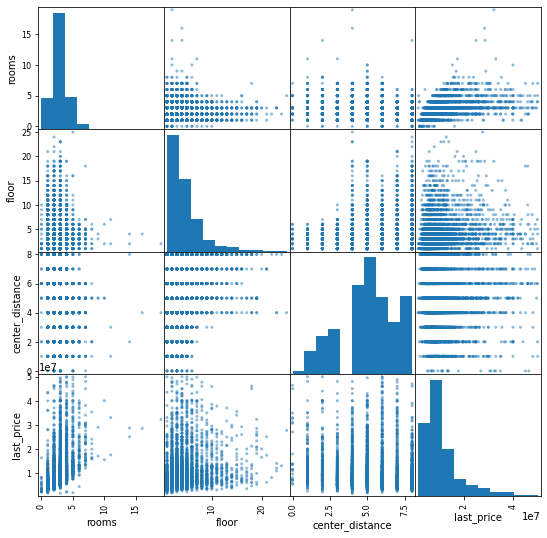

In [77]:
pd.plotting.scatter_matrix(peter_centre_split2, figsize=(9, 9))
plt.show()

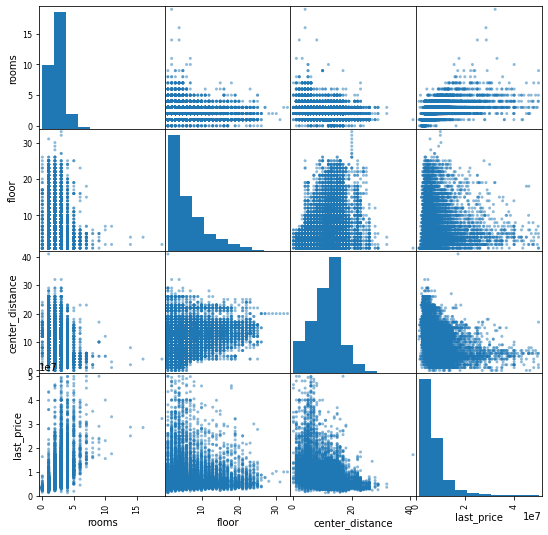

In [78]:
SPb_split = SaintP[['rooms','floor','center_distance','first_day_exposition','last_price']].query('last_price<50000000')
pd.plotting.scatter_matrix(SPb_split, figsize=(9, 9))
plt.show()

In [79]:
peter_centre_split2.corr()

,rooms,floor,center_distance,last_price
rooms,1.000000,-0.072369,-0.204751,0.460113
floor,-0.072369,1.000000,0.278210,0.137907
center_distance,-0.204751,0.278210,1.000000,-0.092538
last_price,0.460113,0.137907,-0.092538,1.000000


In [80]:
SPb_split.corr()

,rooms,floor,center_distance,last_price
rooms,1.000000,-0.163162,-0.277652,0.537355
floor,-0.163162,1.000000,0.226287,0.000471
center_distance,-0.277652,0.226287,1.000000,-0.402960
last_price,0.537355,0.000471,-0.402960,1.000000


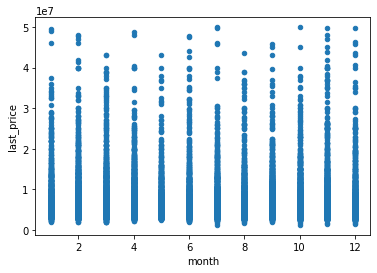

In [81]:
SPb_split = SaintP[['rooms','floor','center_distance','first_day_exposition','last_price','month']].query('last_price<50000000').plot(x='month', y='last_price', kind='scatter')

Взаимосвязи между этими переменными выявлено не было. Глядя на графики можно сказать:
 - количество комнат определяет минимальную цену на квартиру, однако не ограничивает верхнюю планку её стоимости 
 - дорогие квартиры чаще находятся на нижних этажах. Скорее всего в домах с низкой этажностью
 - квартиры с большим количеством комнат находятся на нижних этажах

## Общий вывод

Мы исследовали данные по продаже квартир, применив корреляционный анализ. В ходе работ мы исследовали зависимость цены на квартиры от площади, количества комнат, этажа, высоты потолков, удаленности от центра. 

На основании данных получилось сделать следующие выводы: 
- цена квартиры зависит от общей площади
- количество комнат влияет на минимальную цену квартиры, однако не ограничивает максимальную цену квартиры
- удаленность квартиры от центра города не предопределяет её стоимость, однако ближе к центру находится больше дорогостоящих квартир, которые влият на среднее значение по району
- более дорогие квартиры располагаются на более низких этажах (до 7), то же можно сказать и о квартирах с большим количеством комнат (от 4)

Зависимость цены квартиры от высоты потолков и даты не была обнаружена. 

При поиске аномалий, можно опираться на минимальную цену для квартир с определенным количеством комнат. 

